In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
df = pd.read_csv("/content/drive/MyDrive/enw/train.csv")
df = df.dropna()
#axis="columns", how="any", inplace=Tru
df.isnull().values.any()
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [53]:
df[['Cabin1','Cabin2', 'Cabin3']] = df['Cabin'].str.split('/', expand=True)
df[['Name1','Name2']] = df['Name'].str.split(' ', expand=True)
df[['PassengerId1','PassengerId2']] = df['PassengerId'].str.split('_', expand=True)
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['PassengerId'], axis = 1, inplace = True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,Cabin2,Cabin3,Name1,Name2,PassengerId1,PassengerId2
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Maham,Ofracculy,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Juanna,Vines,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Altark,Susent,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Solam,Susent,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Willy,Santantines,0004,01


In [54]:
df.row

AttributeError: ignored

In [55]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,Cabin2,Cabin3,Name1,Name2,PassengerId1,PassengerId2
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Maham,Ofracculy,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Juanna,Vines,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Altark,Susent,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Solam,Susent,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Willy,Santantines,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,Gravior,Noxnuther,9276,01
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,Kurta,Mondalley,9278,01
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,Fayey,Connon,9279,01
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,Celeon,Hontichre,9280,01


In [56]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cabin1',
       'Cabin2', 'Cabin3', 'Name1', 'Name2', 'PassengerId1', 'PassengerId2'],
      dtype='object')

In [57]:
g = ['HomePlanet', 'CryoSleep', 'Cabin1','Cabin2', 'Cabin3', 'Destination', 'VIP', 'RoomService', 'Name1', 'Name2', 'Transported']
#df = pd.get_dummies(df)
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
# Encode labels in column.
df['HomePlanet']= label_encoder.fit_transform(df['HomePlanet'])
df['CryoSleep']= label_encoder.fit_transform(df['CryoSleep'])
df['Cabin1']= label_encoder.fit_transform(df['Cabin1'])
df['Cabin2']= label_encoder.fit_transform(df['Cabin3'])
df['Cabin3']= label_encoder.fit_transform(df['Cabin3'])
df['Destination']= label_encoder.fit_transform(df['Destination'])
df['VIP']= label_encoder.fit_transform(df['VIP'])
df['Name1']= label_encoder.fit_transform(df['Name1'])
df['Name2']= label_encoder.fit_transform(df['Name2'])
df['Transported']= label_encoder.fit_transform(df['Transported'])
df = df.fillna(0)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,Cabin2,Cabin3,Name1,Name2,PassengerId1,PassengerId2
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1517,1361,0001,01
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,1,1,1321,2006,0002,01
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,1,148,1898,0003,01
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,1,2124,1898,0003,02
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,2470,1697,0004,01


In [58]:
x = np.array(df[['PassengerId1', 'PassengerId2', 'HomePlanet', 'CryoSleep', 'Cabin1', 'Cabin2', 'Cabin3', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name1', 'Name2']])
y = np.array(df['Transported'])
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x)
x = transformer.transform(x)
x


array([[4.90577044e-04, 4.90577044e-04, 4.90577044e-04, ...,
        0.00000000e+00, 7.44205375e-01, 6.67675356e-01],
       [8.10732961e-04, 4.05366481e-04, 0.00000000e+00, ...,
        1.78361252e-02, 5.35489121e-01, 8.13165160e-01],
       [3.82512004e-04, 1.27504001e-04, 1.27504001e-04, ...,
        6.24769607e-03, 1.88705922e-02, 2.42002595e-01],
       ...,
       [9.74817257e-01, 1.05056284e-04, 0.00000000e+00, ...,
        0.00000000e+00, 9.41304302e-02, 4.67500463e-02],
       [9.32952305e-01, 1.00533654e-04, 1.00533654e-04, ...,
        3.25226369e-01, 4.98646922e-02, 9.46021680e-02],
       [8.74825348e-01, 1.88539946e-04, 9.42699728e-05, ...,
        1.13123967e-03, 1.77039009e-01, 8.87080444e-02]])

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.7743119266055046

In [61]:
# creating a class for regression
import random as rd
class LinearRegression:

    def __init__(self, alpha, iterations):
        self.alpha = alpha
        self.iterations = iterations

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.m, self.n = self.x.shape
        self.b = 0
        self.w = np.zeros(self.n)
        for i in range(self.iterations):
            self.updates()

    def updates(self):
        y_pred = 1.0 / (1 + np.exp(-(np.dot(self.x, self.w) + self.b)))
        d_w = (1 / (2 * self.m)) * np.dot(self.x.T, (y_pred - self.y))
        d_b = (1 / (2 * self.m)) * np.sum(y_pred - self.y)
        self.w -= self.alpha * d_w
        self.b -= self.alpha * d_b

    def predict(self, x):
        y_pred = (1.0 / (1 + np.exp(-(np.dot(x, self.w) + self.b))))
        y_pred = np.where( y_pred > 0.5, 1, 0)
        return y_pred



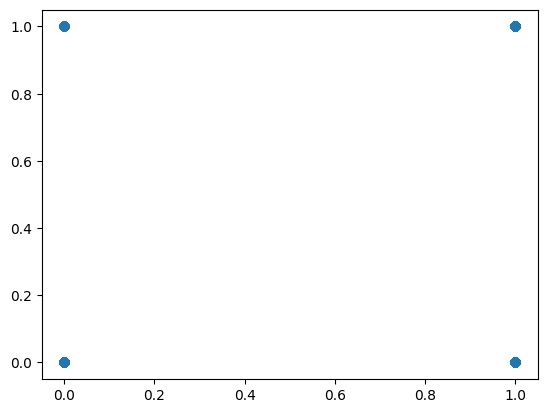

In [62]:
log = LinearRegression(0.01, 100000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test)
plt.show()

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7701834862385321


In [64]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.7417431192660551


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, LSTM

model = Sequential()
#model.add(LSTM(10))
model.add(Dense(60))
model.add(Dense(50))
model.add(Dense(40))
model.add(Dropout(0.5))
model.add(Dense(30))
model.add(Dropout(0.5))
model.add(Dense(18))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss = "MeanSquaredError",
              optimizer = 'adam',
              metrics = ['accuracy'])
with tf.device("/GPU:0"):
    model.fit(X_train, y_train, batch_size = 1, epochs = 5, validation_data = (X_test, y_test))
    #binary_crossentropy

Epoch 1/5
4426/4426 [==============================] - 15s 3ms/step - loss: 0.2767 - accuracy: 0.5861 - val_loss: 0.2003 - val_accuracy: 0.7789
Epoch 2/5
4426/4426 [==============================] - 13s 3ms/step - loss: 0.2227 - accuracy: 0.6471 - val_loss: 0.2045 - val_accuracy: 0.7656
Epoch 3/5
4426/4426 [==============================] - 12s 3ms/step - loss: 0.2155 - accuracy: 0.6740 - val_loss: 0.1927 - val_accuracy: 0.7917
Epoch 4/5
4426/4426 [==============================] - 14s 3ms/step - loss: 0.2141 - accuracy: 0.6880 - val_loss: 0.1923 - val_accuracy: 0.7789
Epoch 5/5
4426/4426 [==============================] - 12s 3ms/step - loss: 0.2129 - accuracy: 0.7070 - val_loss: 0.1941 - val_accuracy: 0.7298


In [70]:
model.layers[0].trainable = False
model.layers[1].trainable = False
model.layers[2].trainable = False
model.pop()
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss = "binary_crossentropy",
              optimizer = 'adam',
              metrics = ['accuracy'])
with tf.device("/GPU:0"):
    model.fit(X_train, y_train, batch_size = 1, epochs = 3, validation_data = (X_test, y_test))


Epoch 1/3
4426/4426 [==============================] - 17s 3ms/step - loss: 4.1921 - accuracy: 0.6218 - val_loss: 2.2535 - val_accuracy: 0.7702
Epoch 2/3
4426/4426 [==============================] - 13s 3ms/step - loss: 3.2255 - accuracy: 0.6814 - val_loss: 2.9870 - val_accuracy: 0.7872
Epoch 3/3
4426/4426 [==============================] - 15s 3ms/step - loss: 2.8126 - accuracy: 0.6984 - val_loss: 3.1365 - val_accuracy: 0.7771


In [71]:
model.layers[0].trainable = False
model.layers[1].trainable = False
model.layers[2].trainable = False
model.layers[3].trainable = False
model.layers[4].trainable = False
model.pop()
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(15))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dropout(0.5))
model.add(Dense(18))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss = "binary_crossentropy",
              optimizer = 'adam',
              metrics = ['accuracy'])
with tf.device("/GPU:0"):
    model.fit(X_train, y_train, batch_size = 1, epochs = 3, validation_data = (X_test, y_test))

Epoch 1/3
4426/4426 [==============================] - 16s 3ms/step - loss: 5.6924 - accuracy: 0.5393 - val_loss: 3.0822 - val_accuracy: 0.7725
Epoch 2/3
4426/4426 [==============================] - 20s 4ms/step - loss: 4.6897 - accuracy: 0.5626 - val_loss: 3.0582 - val_accuracy: 0.7743
Epoch 3/3
4426/4426 [==============================] - 17s 4ms/step - loss: 3.8922 - accuracy: 0.5768 - val_loss: 2.9754 - val_accuracy: 0.7872


In [ ]:
#model.save('/content/drive/MyDrive/enw/titanic_model_79val&68acc.keras')

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
new_model = tf.keras.models.load_model('/content/drive/MyDrive/enw/titanic_model_79val&68acc.keras')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 50)                   900       
                                                                 
 dropout (Dropout)           (1, 50)                   0         
                                                                 
 dense_1 (Dense)             (1, 30)                   1530      
                                                                 
 dropout_1 (Dropout)         (1, 30)                   0         
                                                                 
 dense_2 (Dense)             (1, 1)                    31        
                                                                 
Total params: 2461 (9.61 KB)
Trainable params: 2461 (9.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
test_df = pd.read_csv("/content/drive/MyDrive/enw/test.csv")
#test_df = test_df.dropna()
#axis="columns", how="any", inplace=Tru
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [46]:
test_df[['Cabin1','Cabin2', 'Cabin3']] = test_df['Cabin'].str.split('/', expand=True)
test_df[['Name1','Name2']] = test_df['Name'].str.split(' ', expand=True)
test_df[['PassengerId1','PassengerId2']] = test_df['PassengerId'].str.split('_', expand=True)
test_df.drop(['Name'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['PassengerId'], axis = 1, inplace = True)
test_df.head()
test_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin1', 'Cabin2',
       'Cabin3', 'Name1', 'Name2', 'PassengerId1', 'PassengerId2'],
      dtype='object')

In [47]:
g = ['HomePlanet', 'CryoSleep', 'Cabin1','Cabin2', 'Cabin3', 'Destination', 'VIP', 'RoomService', 'Name1', 'Name2', 'Transported']
#df = pd.get_dummies(df)
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
# Encode labels in column.
test_df['HomePlanet']= label_encoder.fit_transform(test_df['HomePlanet'])
test_df['CryoSleep']= label_encoder.fit_transform(test_df['CryoSleep'])
test_df['Cabin1']= label_encoder.fit_transform(test_df['Cabin1'])
test_df['Cabin2']= label_encoder.fit_transform(test_df['Cabin3'])
test_df['Cabin3']= label_encoder.fit_transform(test_df['Cabin3'])
test_df['Destination']= label_encoder.fit_transform(test_df['Destination'])
test_df['VIP']= label_encoder.fit_transform(test_df['VIP'])
test_df['Name1']= label_encoder.fit_transform(test_df['Name1'])
test_df['Name2']= label_encoder.fit_transform(test_df['Name2'])
#test_df['Transported']= label_encoder.fit_transform(test_df['Transported'])
test_df = test_df.fillna(0)
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin1,Cabin2,Cabin3,Name1,Name2,PassengerId1,PassengerId2
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,1,1,1465,275,0013,01
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,1,1,1219,1190,0018,01
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,1,1,1709,1604,0019,01
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,1,1364,262,0021,01
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,1,1,366,736,0023,01


In [48]:
x = np.array(test_df[['PassengerId1', 'PassengerId2', 'HomePlanet', 'CryoSleep', 'Cabin1', 'Cabin2', 'Cabin3', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name1', 'Name2']])
#y = np.array(test_df['Transported'])
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x)
x = transformer.transform(x)
x

array([[8.71954734e-03, 6.70734411e-04, 0.00000000e+00, ...,
        0.00000000e+00, 9.82625912e-01, 1.84451963e-01],
       [5.45901174e-03, 3.03278430e-04, 0.00000000e+00, ...,
        0.00000000e+00, 3.69696406e-01, 3.60901332e-01],
       [8.10543915e-03, 4.26602060e-04, 4.26602060e-04, ...,
        0.00000000e+00, 7.29062921e-01, 6.84269705e-01],
       ...,
       [9.84653934e-01, 1.06207953e-04, 2.12415906e-04, ...,
        0.00000000e+00, 1.14385966e-01, 1.31804070e-01],
       [9.51526726e-01, 1.02612609e-04, 1.02612609e-04, ...,
        5.36663946e-02, 1.21288104e-01, 3.71457645e-02],
       [9.86197784e-01, 1.06305679e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.31287514e-01, 1.00777784e-01]])

In [49]:
y_pre = new_model.predict(x)
for i in range(len(x)):

  if y_pre[i] <= 0.5:
      y_pre[i] = 0
  else:
      y_pre[i] = 1

134/134 [==============================] - 0s 1ms/step


In [50]:
y_pred = clf.predict(x)
#y_pred = y_pred.reshape(-1, 1)
#y_pre = y_pre.reshape(-1, 1)
print(y_pred.shape, y_pre.shape)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_pre))


(4277,) (4277, 1)
0.9649286883329437


In [51]:
dg = pd.read_csv('/content/drive/MyDrive/enw/test.csv')
#dg = dg.dropna()
n = np.array(dg['PassengerId'])
n = n.reshape(-1)
y_pre = y_pre.reshape(-1)
#y_pre = str(y_pre)
#n = str(n)
print(n.shape, y_pre.shape)
y_pre = np.array(y_pre)
#n = np.array([n, y_pre])
n.shape
#np.savetxt("/content/drive/MyDrive/enw/submission.csv", n, delimiter=",")
dn = pd.DataFrame({"PassengerId" : n, "Transported":y_pred})
dn.to_csv("/content/drive/MyDrive/enw/submission23.csv", index=False)

(4277,) (4277,)


In [42]:
len(dg)

4277